<p>
Homework: https://work.caltech.edu/homework/hw7.pdf
<p>

&#x2714;
Answers:
1. d &#x2714;
2. e &#x2714;
3. d &#x2714;
4. d &#x2714;
5. b &#x2714;
6. d &#x2714;
7. c &#x2714;
8. c &#x2714;
9. d &#x2714;
10. b &#x2714;

<p>
Answer key: https://work.caltech.edu/homework/hw7_sol.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [ ]:
# Questions 1 through 5
# training set: http://work.caltech.edu/data/in.dta
# test set: http://work.caltech.edu/data/out.dta
train = pd.read_fwf('http://work.caltech.edu/data/in.dta', header=None)
train_x = train.iloc[:, :2]
train_y = train.iloc[:, 2]

test = pd.read_fwf('http://work.caltech.edu/data/out.dta', header=None)
test_x = test.iloc[:, :2]
test_y = test.iloc[:, 2]

In [ ]:
def transform(x):
    x1 = x.iloc[:, 0]
    x2 = x.iloc[:, 1]
    
    z = pd.DataFrame(np.ones(len(x)))
    z.loc[:, 1] = x1
    z.loc[:, 2] = x2
    z.loc[:, 3] = x1 ** 2
    z.loc[:, 4] = x2 ** 2
    z.loc[:, 5] = x1 * x2
    z.loc[:, 6] = np.abs(x1 - x2)
    z.loc[:, 7] = np.abs(x1 + x2)
    return z

In [ ]:
train_z = transform(train_x)
test_z = transform(test_x)

In [ ]:
from numpy.linalg import inv
def linear_regression(Z, y):
    Z_T_Z = np.dot(Z.T, Z)
    Z_T_Z_inverse = inv(Z_T_Z)
    Z_dagger = np.dot(Z_T_Z_inverse, Z.T)
    weights = np.dot(Z_dagger, y)
    return weights

In [ ]:
def error(W, X, y):
    misclassified = np.sign(np.dot(X, W)) != y
    return 1.0 * misclassified.sum()/len(misclassified)

In [ ]:
def calc_error(X, y, X_val, y_val, X_test, y_test):
    weights = linear_regression(X, y)
    print "train   ", np.round(error(weights, X, y), 8)
    print "validate", np.round(error(weights, X_val, y_val), 8)
    print "test    ", np.round(error(weights, X_test, y_test), 8)

In [ ]:
train_set_size = 25

z_train = train_z.head(train_set_size)
y_train = train_y.head(train_set_size)

z_validate = train_z.tail(len(train_z) - train_set_size)
y_validate = train_y.tail(len(train_z) - train_set_size)

z_test = test_z
y_test = test_y

In [ ]:
for k in [3, 4, 5, 6, 7]:
    print "Trying k: ", k
    calc_error(z_train.ix[:,0:k], y_train, 
               z_validate.ix[:,0:k], y_validate,
               z_test.ix[:,0:k], y_test)

In [ ]:
for k in [3, 4, 5, 6, 7]:
    print "Trying k: ", k
    calc_error(z_validate.ix[:,0:k], y_validate,
               z_train.ix[:,0:k], y_train, 
               z_test.ix[:,0:k], y_test)

In [ ]:
#Question 6

N=1000
e1 = np.random.uniform(size=N)
e2 = np.random.uniform(size=N)
e = np.minimum(e1, e2)

print np.mean(e1), np.mean(e2), np.mean(e)

In [73]:
# Question 7
from math import sqrt
for index, rho in enumerate([sqrt(sqrt(3) + 4),
                             sqrt(sqrt(3) - 1),
                             sqrt(9 + 4 * sqrt(6)),
                             sqrt(9 - sqrt(6)),
                             0,
                             1
                            ]):
    rho_plus_1_sq = (rho + 1) ** 2
    rho_minus_1_sq = (rho - 1) ** 2
    value = 8 * rho_plus_1_sq + 8 * rho_minus_1_sq - rho_plus_1_sq * rho_minus_1_sq
    print "{}: Rho: {}, Value: {}".format(index, np.round(rho, 2), np.round(value, 2))

0: Rho: 2.39, Value: 85.32
1: Rho: 0.86, Value: 27.64
2: Rho: 4.34, Value: -0.0
3: Rho: 2.56, Value: 90.0
4: Rho: 0, Value: 15
5: Rho: 1, Value: 32


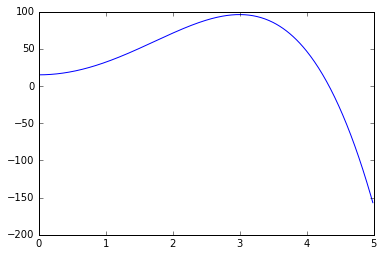

In [6]:
rho = np.arange(0, 5, .01);
def f(rho):
    rho_plus_1_sq = (rho + 1) ** 2
    rho_minus_1_sq = (rho - 1) ** 2
    return 8 * rho_plus_1_sq + 8 * rho_minus_1_sq - rho_plus_1_sq * rho_minus_1_sq
plt.plot(rho, f(rho))

In [41]:
# Questions 8 through 10

from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

class Line:
    def __init__(self, weights=None, points=None):
        if (weights is None and points is None) or (weights is not None and points is not None):
            raise ValueError("Either weights or points, but only one of them, must be provided to specify the line")
        if weights is not None:
            assert len(weights) == 3
            w0, w1, w2 = weights
            w0 /= w2
            w1 /= w2
            self.intercept = -w0
            self.slope = -w1
        else:
            assert len(points) >= 2
            self.slope = (points[1].y-points[0].y)/(points[1].x-points[0].x)
            self.intercept = points[0].y - self.slope * points[0].x
    
    def get_y(self, x):
        return self.intercept + self.slope * x
    
    def get_sign(self, x, y):
        return np.sign(- self.intercept - self.slope*x + y )
    
    def get_weights(self):
        return np.array([-self.intercept, -self.slope, 1])

def make_target_function(plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    x1_s = list(np.random.uniform(x_min, x_max, size=2))
    x2_s = list(np.random.uniform(y_min, y_max, size=2))
    points = [Point(x1_s[i], x2_s[i]) for i in range(len(x1_s))]
    target_function = Line(points=points)
    if plot:
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(x1_s, x2_s, color='#006400')
        plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
    return target_function

def generate_samples(target_function, N, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    x1_s = list(np.random.uniform(x_min, x_max, size=N))
    x2_s = list(np.random.uniform(y_min, y_max, size=N))
    y_s = [target_function.get_sign(x1, x2) for x1, x2 in zip(x1_s, x2_s)]
    if plot:
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(x1_s, x2_s, c=y_s, marker='x')
    X = np.array([x1_s, x2_s]).transpose()
    X_with_bias = np.array([np.ones(N), x1_s, x2_s]).transpose()
    y = np.array(y_s)
    return X, X_with_bias, y

def score(target_function, predicted_function, large_N=10000, x_min=-1, x_max=1, y_min=-1, y_max=1):
    test_sample_x1 = list(np.random.uniform(x_min, x_max, size=large_N))
    test_sample_x2 = list(np.random.uniform(y_min, y_max, size=large_N))
    test_sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(test_sample_x1, test_sample_x2)]
    test_sample_y_pred = [predicted_function.get_sign(x1, x2) for x1, x2 in zip(test_sample_x1, test_sample_x2)]
    return 1.0 * np.sum(np.array(test_sample_y) != np.array(test_sample_y_pred))/len(test_sample_y)

PLA weights: [-3.         -4.53143328  2.28251987]
Predicted function performed at 0.4% inaccuracy on out of sample data set


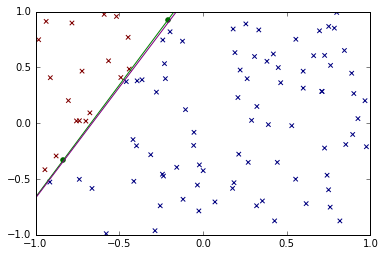

In [42]:
def PLA(X, y, initial_weights, plot=False, max_iterations = 15000, verbose=False):
    w = initial_weights.copy()
    iter = 0
    while iter < max_iterations:
        if verbose:
            print "Iteration {} w {}".format(iter, w)
        predictions = np.sign(np.dot(X, w))
        misclassfied = predictions != y
        num_misclassified = np.sum(misclassfied)
        if num_misclassified == 0:
            break
        if verbose:
            print "Still misclassified: {}".format(num_misclassified)
        chosen = np.random.choice(np.where(misclassfied)[0])
        w += X[chosen] * y[chosen]
        iter += 1
    if verbose:
        print "Returning iter {}".format(iter)
        print
    return (iter+1 if iter < max_iterations else None, w)

def PLA_run(N, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    target_function = make_target_function(plot)
    _, X, y = generate_samples(target_function, N, plot=plot)
    while (1 not in y or -1 not in y):
        target_function = make_target_function(plot)
        _, X, y = generate_samples(target_function, N, plot=plot)
    _, pla_w = PLA(X, y, np.array([0., 0., 0.]))
    if plot:
        print "PLA weights: {}".format(pla_w)
    predicted_function = Line(weights=pla_w)
    if plot:
        plt.plot([x_min, x_max], [predicted_function.get_y(x_min), predicted_function.get_y(x_max)], color='purple')
    inaccuracy = score(target_function, predicted_function)
    return inaccuracy

inaccuracy = PLA_run(N=100, plot=True)
print "Predicted function performed at {}% inaccuracy on out of sample data set".format(inaccuracy*100)

In [43]:
runs=100
N=100

print np.mean([PLA_run(N) for i in range(runs)], axis=0)

0.023127


SVM weights: [-14.59586421   3.98795887  17.41147751]
Predicted function performed at 0.68% inaccuracy on out of sample data set (3 support vectors)


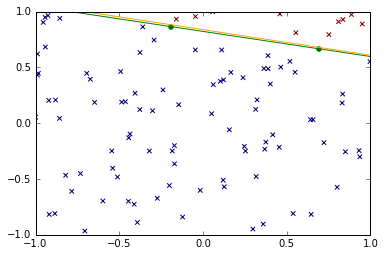

In [44]:
import cvxopt

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def SVM(X, y, kernel=linear_kernel):
    '''
    The SVM algorithm here is taken for academic use from publicly available code by Mathieu Blondel on GitHub.
    https://gist.github.com/mblondel/586753/7b4f65314bb9a8b6ca82794b8b613b6edcd40d46
    '''
    n_samples, n_features = X.shape

    # Gram matrix
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = kernel(X[i], X[j])

    P = cvxopt.matrix(np.outer(y,y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1,n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
    h = cvxopt.matrix(np.zeros(n_samples))

    # Solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a_all = np.ravel(solution['x'])

    sv_index = a_all > 1e-5
    ind = np.arange(len(a_all))[sv_index]

    a = a_all[sv_index]
    sv = X[sv_index]
    sv_y = y[sv_index]

    # Intercept
    b = 0
    for n in range(len(a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n], sv_index])
    b /= len(a)

    # Weight vector
    w = np.zeros(n_features)
    for n in range(len(a)):
        w += a[n] * sv_y[n] * sv[n]
    
    return a, sv, sv_y, b, w

def SVM_run(N, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    target_function = make_target_function(plot)
    X, _, y = generate_samples(target_function, N, plot=plot)
    while (1 not in y or -1 not in y):
        target_function = make_target_function(plot)
        X, _, y = generate_samples(target_function, N, plot=plot)
    a, sv, sv_y, b, w = SVM(X, y)
    sv_s = len(sv)
    svm_w = np.insert(w, 0, b)
    if plot:
        print "SVM weights: {}".format(svm_w)
    predicted_function = Line(weights=svm_w)
    if plot:
        plt.plot([x_min, x_max], [predicted_function.get_y(x_min), predicted_function.get_y(x_max)], color='orange')
    inaccuracy = score(target_function, predicted_function)
    return sv_s, inaccuracy

sv_s, inaccuracy = SVM_run(N=100, plot=True)
print "Predicted function performed at {}% inaccuracy on out of sample data set ({} support vectors)".format(inaccuracy*100, sv_s)

In [45]:
runs=100
N=100

print np.mean([SVM_run(N) for i in range(runs)], axis=0)

[ 3.14      0.019695]


PLA weights: [ 0.         -1.63201549  2.1459358 ]
SVM weights: [-0.09560654 -2.81126132  4.04783726]


(0.0429, 0.026, 3, True)

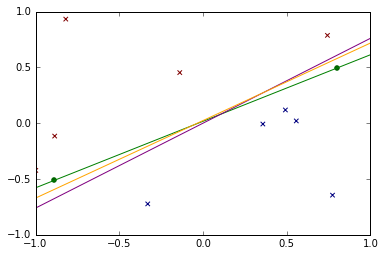

In [56]:
def PLA_SVM_comparison(N=100, plot=False, x_min=-1, x_max=1, y_min=-1, y_max=1):
    target_function = make_target_function(plot)
    X, X_with_bias, y = generate_samples(target_function, N, plot=plot)
    while (1 not in y or -1 not in y):
        target_function = make_target_function(plot)
        X, X_with_bias, y = generate_samples(target_function, N, plot=plot)
    
    _, pla_w = PLA(X_with_bias, y, np.array([0., 0., 0.]))
    if plot:
        print "PLA weights: {}".format(pla_w)
    pla_predicted_function = Line(weights=pla_w)
    if plot:
        plt.plot([x_min, x_max], [pla_predicted_function.get_y(x_min), pla_predicted_function.get_y(x_max)], color='purple')
    pla_inaccuracy = score(target_function, pla_predicted_function)

    a, sv, sv_y, b, w = SVM(X, y)
    svm_w = np.insert(w, 0, b)
    if plot:
        print "SVM weights: {}".format(svm_w)
    svm_predicted_function = Line(weights=svm_w)
    if plot:
        plt.plot([x_min, x_max], [svm_predicted_function.get_y(x_min), svm_predicted_function.get_y(x_max)], color='orange')
    svm_inaccuracy = score(target_function, svm_predicted_function)
    sv_s = len(sv)
    return pla_inaccuracy, svm_inaccuracy, sv_s, svm_inaccuracy < pla_inaccuracy

PLA_SVM_comparison(N=10, plot=True)

In [67]:
runs = 1000
experiment = np.mean(np.array([PLA_SVM_comparison(N=10) for i in range(runs)]), axis=0)
print "PLA: {}, SVM: {}, support vectors: {}, SVM better than PLA: {}".format(*experiment)

PLA: 0.1600626, SVM: 0.1369177, support vectors: 2.915, SVM better than PLA: 0.618


In [68]:
runs = 1000
experiment = np.mean(np.array([PLA_SVM_comparison(N=100) for i in range(runs)]), axis=0)
print "PLA: {}, SVM: {}, support vectors: {}, SVM better than PLA: {}".format(*experiment)

PLA: 0.0194783, SVM: 0.0181335, support vectors: 3.108, SVM better than PLA: 0.611
